In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns
import joypy
import os

In [3]:
lincoln_weather = pd.read_csv(os.path.join('data','lincoln_weather.csv'))

In [4]:
lincoln_weather['CST'] = pd.to_datetime(lincoln_weather['CST'], infer_datetime_format=True)

In [5]:
lincoln_weather['CST'].dt.strftime('%m')

0      01
1      01
2      01
3      01
4      01
       ..
361    12
362    12
363    12
364    12
365    12
Name: CST, Length: 366, dtype: object

In [6]:
lincoln_weather['CST'].dt.month

0       1
1       1
2       1
3       1
4       1
       ..
361    12
362    12
363    12
364    12
365    12
Name: CST, Length: 366, dtype: int64

In [7]:
# extract month from CST column
lincoln_weather['Month'] =lincoln_weather['CST'].dt.month

In [8]:
lincoln_weather_monthly_change= lincoln_weather[['Month','Mean Temperature [F]']].groupby('Month').agg({('Mean Temperature(F)','mean'), ('Mean Temperature(F)','std')})
lincoln_weather_monthly_change.columns=['Mean','Std']
lincoln_weather_monthly_change['Std'] = lincoln_weather_monthly_change['Std']*2
lincoln_weather_monthly_change = lincoln_weather_monthly_change.reset_index()
months = {1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}
lincoln_weather_monthly_change['Month'].replace(months, inplace=True)

Text(0.5, 0, 'month')

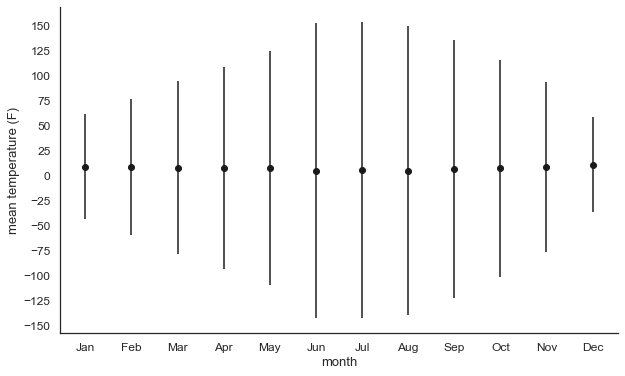

In [9]:
fig, ax = plt.subplots(1,1,figsize=(10,6))

ax.errorbar(
    x=lincoln_weather_monthly_change['Month'],
    y=lincoln_weather_monthly_change['Mean'],
    yerr=lincoln_weather_monthly_change['Std'],
    fmt="o",
    ecolor='k',
    color='k'
    )

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.yaxis.set_major_locator(ticker.MultipleLocator(25))
# ax.yaxis.set_major_locator(plt.NullLocator())
ax.tick_params(axis='both', which='major', labelsize = 12)
ax.set_ylabel("mean temperature (F)", size=13)
ax.set_xlabel("month", size=13)

(0.5, 1.3)

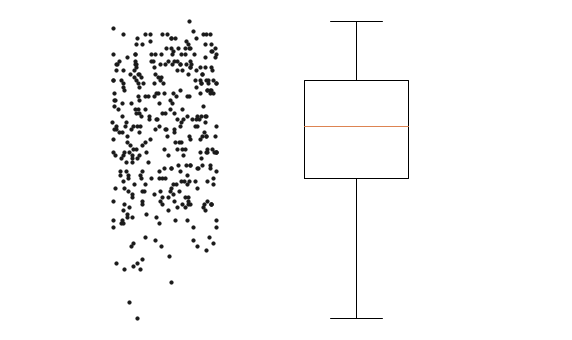

In [10]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.boxplot(
    x = lincoln_weather['Mean Temperature [F]']
)

ax.scatter(
    0.65+0.15*np.random.random(len(lincoln_weather['Mean Temperature [F]'])),
    lincoln_weather['Mean Temperature [F]'],
    color='k',
    s = 10
    )
ax.spines['left'].set_position(('axes', 0.2))
ax.spines[:].set_visible(False)
ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_locator(plt.NullLocator())
ax.set_xlim([0.5,1.3])

In [11]:
months = {1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}
lincoln_weather['month']=lincoln_weather['Month'].replace(months)
monthly_temperature = []
for month in lincoln_weather['Month'].unique():
    monthly_temperature.append(lincoln_weather[lincoln_weather.Month==month]['Mean Temperature [F]'].tolist())

[]

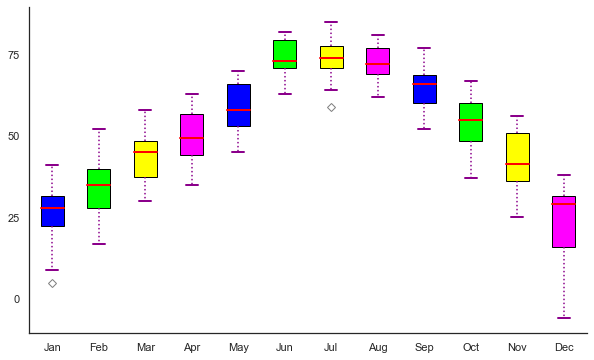

In [12]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
axes = ax.boxplot(
    monthly_temperature,
    patch_artist = True
    )
ax.set_xticklabels(lincoln_weather['month'].unique())
ax.yaxis.set_major_locator(ticker.MultipleLocator(25))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# styling the boxplots
colors = [
    '#0000FF', '#00FF00', '#FFFF00', '#FF00FF', 
    '#0000FF', '#00FF00', '#FFFF00', '#FF00FF', 
    '#0000FF', '#00FF00', '#FFFF00', '#FF00FF', 
    '#0000FF', '#00FF00', '#FFFF00', '#FF00FF'
    ]

for patch, color in zip(axes['boxes'],colors):
    patch.set(facecolor = color)

for whisker in axes['whiskers']:
    whisker.set(
        color="#8B008B",
        linewidth = 1.5,
        linestyle = ":"
        )

for cap in axes['caps']:
    cap.set(
        color = "#8B008B",
        linewidth = 2
    )

for median in axes['medians']:
    median.set(
        color = "red",
        linewidth = 2
    )

for flier in axes['fliers']:
    flier.set(
        color = "red",
        marker = "D",
        alpha = 0.5,
        markersize=5
    )

ax.plot()


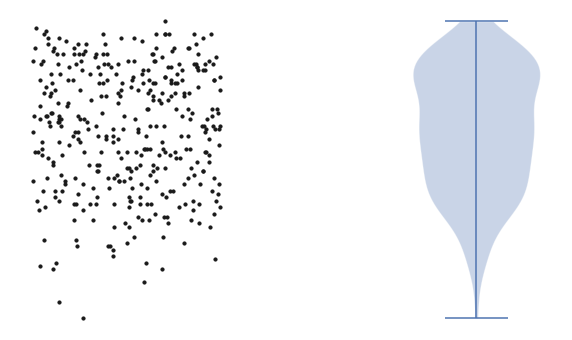

In [13]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.violinplot(
    lincoln_weather['Mean Temperature [F]'],
    widths=0.1
)
ax.scatter(
    0.65+0.15*np.random.random(len(lincoln_weather['Mean Temperature [F]'])),
    lincoln_weather['Mean Temperature [F]'],
    color='k',
    s = 10
    )

ax.spines[:].set_visible(False)
ax.xaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_locator(plt.NullLocator())

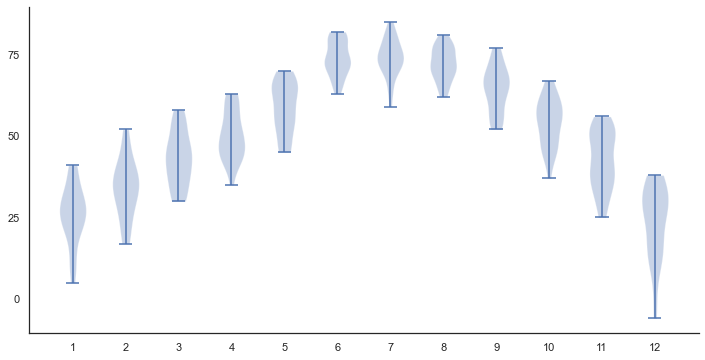

In [14]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

axes = ax.violinplot(
    monthly_temperature,
    # patch_artist = True
    )

# ax.set_xticklabels(lincoln_weather['month'].unique())
ax.yaxis.set_major_locator(ticker.MultipleLocator(25))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

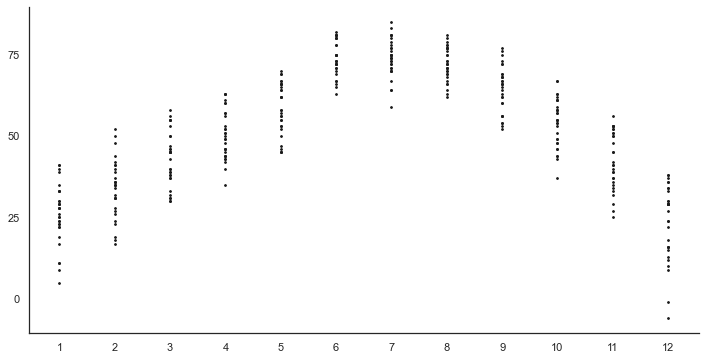

In [15]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.scatter(
    x=lincoln_weather['Month'],
    y=lincoln_weather['Mean Temperature [F]'],
    s = 3,
    color = 'k'
)
ax.yaxis.set_major_locator(ticker.MultipleLocator(25))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ax.set_xticklabels(lincoln_weather['month'].unique().tolist())

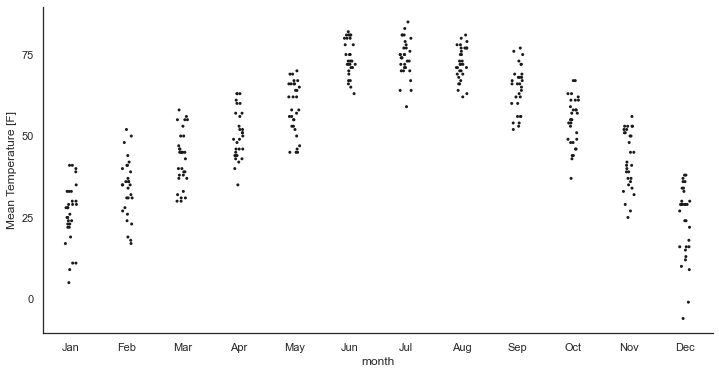

In [16]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.stripplot(
    data = lincoln_weather,
    x = "month",
    y = 'Mean Temperature [F]',
    size = 3,
    color = 'k'
)

ax.yaxis.set_major_locator(ticker.MultipleLocator(25))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

<AxesSubplot:xlabel='month', ylabel='Mean Temperature [F]'>

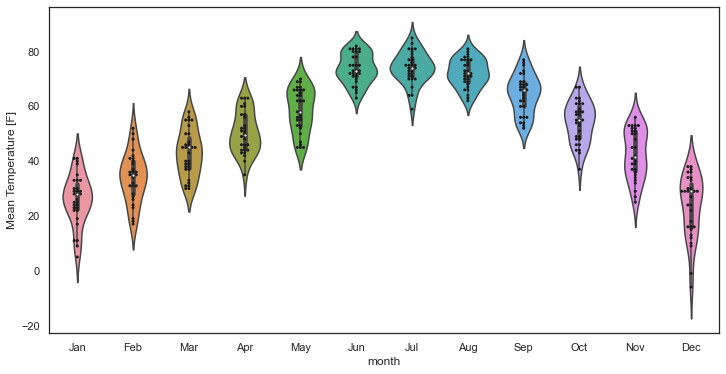

In [17]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.swarmplot(
    data = lincoln_weather,
    x = "month",
    y = 'Mean Temperature [F]',
    size = 3,
    color = 'k',
)

sns.violinplot(
    data = lincoln_weather,
    y = 'Mean Temperature [F]',
    x = 'month'
    )


### Overlapping densities ('ridge plot')

/Applications/Utilities/anaconda/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Applications/Utilities/anaconda/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Applications/Utilities/anaconda/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Applications/Utilities/anaconda/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all

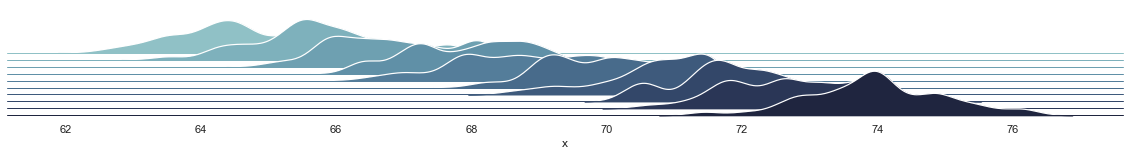

In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
sns.set_theme(style = "white", rc = {"axes.facecolor":(0,0,0,0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list('ABCDEFGHIJ'), 50)

df = pd.DataFrame(dict(x=x, g = g))

m = df.g.map(ord)
df['x'] += m

# Initialize the FaceGrid object
pal = sns.cubehelix_palette(10, rot = -0.25, light = .7)
g = sns.FacetGrid(df, row = "g", hue = "g", aspect = 100, height = .2, palette = pal)
g.map(
    sns.kdeplot, 
    "x",
    bw_adjust=.5,
    # binwidth=1,
    clip_on=False,
    fill=True, alpha=1, linewidth=1
      )
g.map(
    sns.kdeplot,
    "x",
    clip_on=False,
    color = "w",
    lw = 1.2,
    bw_adjust = .5
    )

g.refline(
    y=0,
    linewidth = 1,
    linestyle = "-",
    color = None,
    clip_on = False
    )

def label(x, color, label):
    ax = plt.gca()
    ax.grid()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
    ax.text(
        0,
        .2,
        label,
        fontweight = "bold",
        color = color,
        ha = "left",
        va = "center",
        transform = ax.transAxes
        )

# g.map(label,"x")
g.figure.subplots_adjust(hspace = -.85)
g.set_titles("")
g.set(yticks = [],ylabel="")
g.despine(bottom = True, left = True)


/Applications/Utilities/anaconda/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Applications/Utilities/anaconda/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Applications/Utilities/anaconda/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Applications/Utilities/anaconda/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all

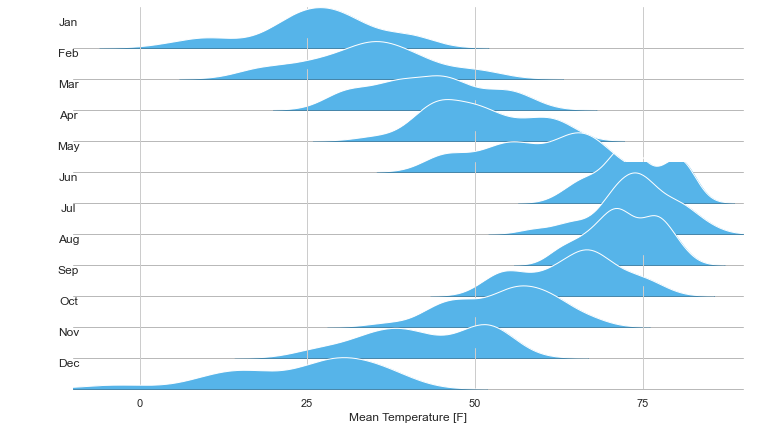

In [109]:
# fig,ax = plt.subplots(1,1,figsize =(12,6))
sns.set_theme(style = "white", rc = {"axes.facecolor":(0,0,0,0)})
g = sns.FacetGrid(
    lincoln_weather,
    row = 'month',
    aspect = 20, 
    height = .5
    )
g.map(
    sns.kdeplot,
    "Mean Temperature [F]",
    # kde=True,
    bw_adjust = .8,
    fill = True,
    alpha = 1,
    color = "#56B4E9",
)
g.map(
    sns.kdeplot,
    "Mean Temperature [F]",
    clip_on=False,
    color = "w",
    lw = 1,
    bw_adjust = .8
    )
g.refline(
    y=0,
    linewidth = 1,
    linestyle = "-",
    color = "k",
    alpha=0.3,
    clip_on = False
    )


def label(color):
    ax = plt.gca()
    ax.grid()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(25))
    ax.set_ylim([0,0.05])
    ax.set_xlim([-10,90])
    # ax.text(
    #     0,
    #     .2,
    #     "Jan",
    #     fontweight = "bold",
    #     color = color,
    #     ha = "left",
    #     va = "center",
    #     transform = ax.transAxes
    # )

ylabels = lincoln_weather['month'].unique().tolist()


g.map(label)

g.set_titles("")
g.figure.subplots_adjust(hspace = -.25)
g.set(yticks =[], ylabel="")
g.despine(bottom = True, left = True)
for ax,ylabel in zip(g.axes,ylabels):
    ax[0].set_ylabel(
        ylabel,
        rotation=0,
        )


In [97]:
movie_lengths = pd.read_csv(os.path.join('data','movie_lengths.csv'))
movie_lengths = movie_lengths[movie_lengths.length<=200]

/Applications/Utilities/anaconda/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Applications/Utilities/anaconda/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Applications/Utilities/anaconda/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Applications/Utilities/anaconda/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all

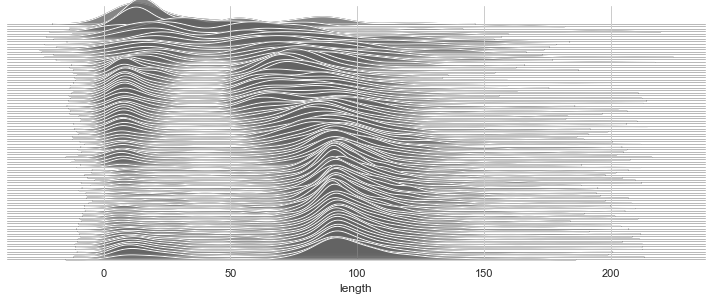

In [118]:
# define a sns.FacetGrid
g = sns.FacetGrid(
    movie_lengths,
    row = "year",
    aspect = 250, 
    height = .05
)
g.map(
    sns.kdeplot,
    "length",
    bw_adjust =.5,
    fill = True,
    color = 'k',
    alpha = 0.7,
    clip_on=False,
)
g.map(
    sns.kdeplot,
    "length",
    bw_adjust =.5,
    fill = True,
    color = 'w',clip_on=False,
    # alpha = 0.7
)
g.refline(
    y=0,
    linewidth = 1,
    linestyle = "-",
    color = "k",
    alpha=0.3,
    clip_on = False
    )

def label(color):
    ax = plt.gca()
    ax.grid()
    # ax.xaxis.set_major_locator(ticker.MultipleLocator(25))
    ax.set_ylim([0,0.02])
    # ax.set_xlim([0,200])

g.map(label)
g.set_titles("")
g.figure.subplots_adjust(hspace = -.85)
g.set(yticks = [], ylabel="")
g.despine(bottom = True, left = True)

In [125]:
all_house_88_113 = pd.read_csv(os.path.join('data','all_house_88_113.csv'))
all_house_88_113['party'] = all_house_88_113['party_code'].apply(lambda x: "Republicans" if x==200 else "Democrats")

/Applications/Utilities/anaconda/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Applications/Utilities/anaconda/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Applications/Utilities/anaconda/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Applications/Utilities/anaconda/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all

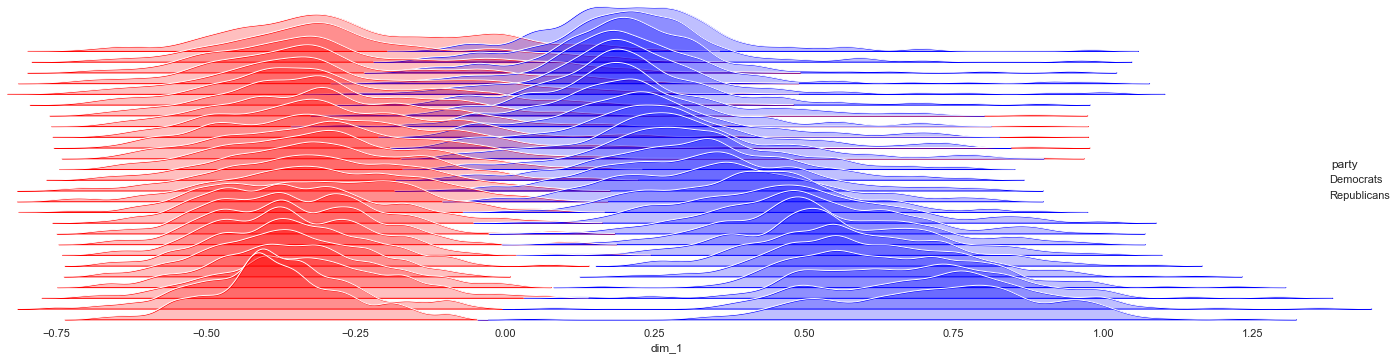

In [182]:
pal = ['red','blue']
g = sns.FacetGrid(
    all_house_88_113,
    row = "year1",
    hue = "party",
    hue_order = ["Democrats","Republicans"],
    aspect = 100,
    height = 0.2,
    palette = pal
)

g.map(
    sns.kdeplot,
    "dim_1",
    bw_adjust = 0.5,
    fill = True,
    clip_on = False ,
    
    # hue = 'party'
)

g.map(
    sns.kdeplot,
    "dim_1",
    bw_adjust = 0.5,
    color = 'w',
    clip_on = False ,
    linewidth = 1      
)

def label(color,label):
    ax = plt.gca()
    # ax.grid()
    ax.set_xlim([-0.76,1.3])
    ax.yaxis.grid()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(.25))
    ax.set_ylim([0,1])

g.figure.subplots_adjust(hspace = -.25)
g.map(label)
g.set_titles("")
g.set(yticks = [], ylabel="")
g.despine(bottom = True, left = True)
g.add_legend()